## Illustration de la régression linéaire mulltiple sur la colonne Admission_chance du dataset Admission.csv

In [1]:
# Import des librairies nécessairespour le bon déoulement du travail
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Affectation du csv dans une variable
data = pd.read_csv("Admission.csv")

In [3]:
# Visualisation des cinq premières ligne du dataset
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Connaitre les dimensions du dataset
data.shape

(400, 9)

In [5]:
# Vérification des lignes dupliquées
data_duplicated = data.duplicated()
data_duplicated.value_counts()

False    400
dtype: int64

In [6]:
# Vérificaton des lignes nulles
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admission Chance     0
dtype: int64

In [7]:
# Verifiaction du type des colonnes du dataset
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Admission Chance     float64
dtype: object

In [8]:
# Affichage des statistque de base
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
# renommage des colonnes du dataset pour une utilisation plus optimale de celles-ci
data.rename(columns={"Serial No.": "Serial_No"}, inplace=True)
data.rename(columns={"TOEFL Score": "TOEFL_Score"}, inplace=True)
data.rename(columns={"GRE Score": "GRE_Score"}, inplace=True)
data.rename(columns={"University Rating": "University_Rating"}, inplace=True)
data.rename(columns={"Admission Chance": "Admission_Chance"}, inplace=True)
data.rename(columns={"Admission Chance": "Admission_Chance"}, inplace=True)
data.rename(columns={"LOR ": "LOR"}, inplace=True)

In [10]:
# Visualiser toutes les relations entre les variables
#sns.pairplot(data=data, x_vars=["GRE_Score",
                          # "TOEFL_Score", "University_Rating", "SOP", "LOR", "CGPA","Research"],
            # y_vars=["Admission_Chance"])

<AxesSubplot:>

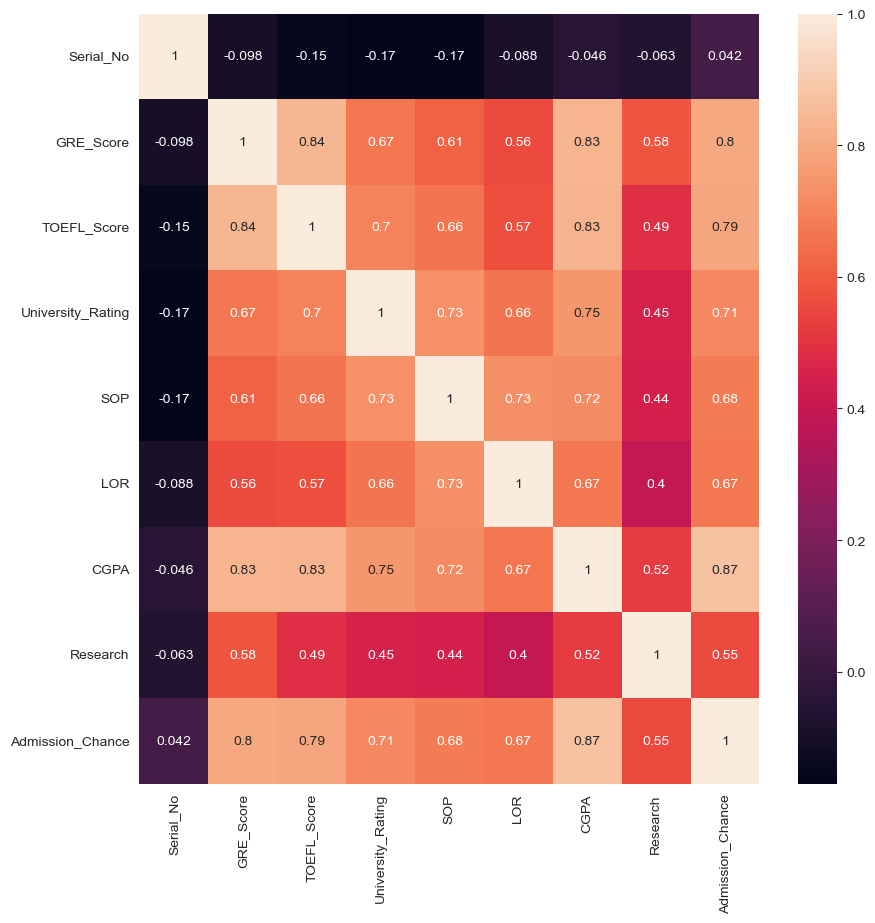

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [20]:
data.drop(["Serial_No"], axis=1, inplace=True)

In [21]:
data

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admission_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [40]:
y = data.iloc[:,-1]
data[0:5]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admission_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
# Selection des colonnes de variables indépendantes et la variable dépendantes
X = data[['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', "CGPA",'Research']]
y = data['Admission_Chance']

In [13]:
# import des librairies pour le training et le test
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Dviiser les données en ensemble de fromation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Construisons le modèle de regression multiple en utilisant la bibliothèque scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# afficher la pente et l'interception sur l'axe des y
print(model.coef_)
print(model.intercept_)

[ 0.00186251  0.00272369  0.00737745 -0.00029274  0.01577024  0.11466916
  0.02222705]
-1.2302337510969905


In [17]:
# Tester le modèle et évaluer les performances
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print("Train MSE: ", mse_train)
print("Train r2: ",r2_train)

Train MSE:  0.0038704218434173245
Train r2:  0.7951946003191085


In [18]:
# Tester le modèle et évaluer les performances
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test= r2_score(y_test, y_pred_test)
print("Test MSE: ", mse_test)
print("Test r2: ", r2_test)

Test MSE:  0.004617003377285015
Test r2:  0.821208259148699


In [19]:
# Utilisation du modèle pour des prévisions
x_new = np.array([3, 4, 5, 4, 5, 8, 5]).reshape(1, -1)
y_new = model.predict(x_new)
print('Prediction: ',y_new)

Prediction:  [-0.07069545]


C:\Users\ngoue\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
# Standardisation obligatoire car il y a un déphasage entre les différentes valeurs
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()